# <b>Running notebook<b>

## Imports + mount drive

In [1]:
import numpy as np
import os
import pandas as pd
import math
import cv2
import tensorflow as tf
import joblib
import io
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from concurrent.futures import ThreadPoolExecutor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
from tensorflow.keras import layers, models , regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization,SeparableConv2D,Activation,MaxPool2D,AveragePooling2D,UpSampling2D,Conv2DTranspose
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping , LearningRateScheduler,ReduceLROnPlateau
from tensorflow.keras.preprocessing import image
from google.colab import files

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Model 1 - upload and test

Saving IM-0007-0001.jpeg to IM-0007-0001 (7).jpeg
1/1 [==============================] - 0s 276ms/step


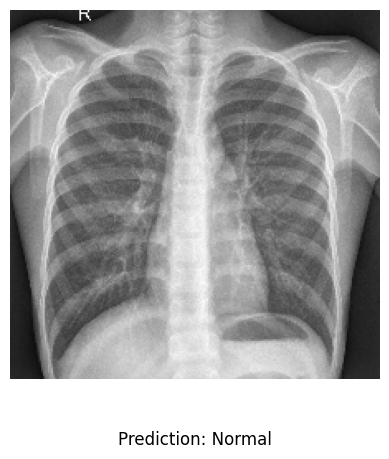

In [14]:
# Load the trained model
loaded_model = load_model("/content/drive/MyDrive/FinalExercise/model1.keras")

# Function to preprocess the image
def preprocess_image(img):
    img_gray = img.convert('L')  # Convert to grayscale
    img_array = image.img_to_array(img_gray)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Function to predict the class of the image
def predict_image_class(img, model):
    img_array = preprocess_image(img)
    prediction = model.predict(img_array)
    return prediction

# Upload images
uploaded = files.upload()

for file_name in uploaded.keys():
    # Load the uploaded image
    img = image.load_img(file_name, target_size=(224, 224))

    # Get the prediction
    prediction = predict_image_class(img, loaded_model)

    # Display the image
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Display the prediction above the image
    if prediction[0][0] > 0.5:
        plt.title(f"Prediction: Pneumonia", y=-0.2)
    else:
        plt.title(f"Prediction: Normal", y=-0.2)

    plt.show()

## Model 2 - upload and test

Saving IM-0007-0001.jpeg to IM-0007-0001 (8).jpeg
1/1 [==============================] - 0s 171ms/step


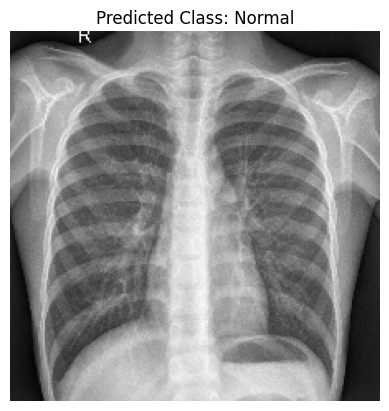

In [15]:
# Load the trained model
loaded_model2 = load_model("/content/drive/MyDrive/FinalExercise/model2.keras")

# Function to preprocess the image
def preprocess_image(img):
    img_gray = img.convert('L')  # Convert to grayscale
    img_array = image.img_to_array(img_gray)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Preprocess all images once
uploaded_images = {}
for file_name, file_content in files.upload().items():
    img = image.load_img(io.BytesIO(file_content), target_size=(224, 224))
    uploaded_images[file_name] = preprocess_image(img)

# Predict for all images
class_names = ['Normal', 'Bacterial_Pneumonia', 'Viral_Pneumonia']
for file_name, img_array in uploaded_images.items():
    # Get the prediction
    prediction = loaded_model2.predict(img_array)
    predicted_class_index = np.argmax(prediction[0])
    predicted_class_name = class_names[predicted_class_index]

    img = image.array_to_img(img_array[0])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"Predicted Class: {predicted_class_name}")
    plt.show()

## KNN - upload and test

Saving person1_virus_7.jpeg to person1_virus_7 (3).jpeg
1/1 [==============================] - 0s 165ms/step


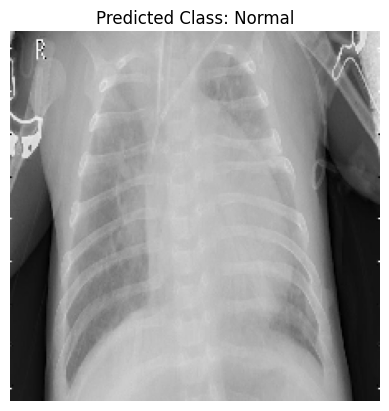

In [6]:
# Load the trained model
knn_classifier = joblib.load("/content/drive/MyDrive/FinalExercise/knn_classifier.joblib")
loaded_model2 = load_model("/content/drive/MyDrive/FinalExercise/model2.keras")


# Function to preprocess the image
def preprocess_image(img):
    img_gray = img.convert('L')  # Convert to grayscale
    img_array = image.img_to_array(img_gray)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Upload and preprocess the image
uploaded_images = {}
for file_name, file_content in files.upload().items():
    img = image.load_img(io.BytesIO(file_content), target_size=(224, 224))
    img_array = preprocess_image(img)
    uploaded_images[file_name] = img_array

# Predict for all images
class_names = ['Normal', 'Bacterial_Pneumonia', 'Viral_Pneumonia']
for file_name, img_array in uploaded_images.items():
    # Get the prediction from the autoencoder
    embedding = loaded_model2.predict(img_array)

    # Predict label using KNN classifier
    predicted_label = knn_classifier.predict(embedding)

    # Display the image and predicted label
    img = image.array_to_img(img_array[0])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"Predicted Class: {class_names[predicted_label[0]]}")
    plt.show()


## Anomaly detection - upload and test

Saving person1_virus_7.jpeg to person1_virus_7 (1).jpeg
1/1 [==============================] - 1s 555ms/step


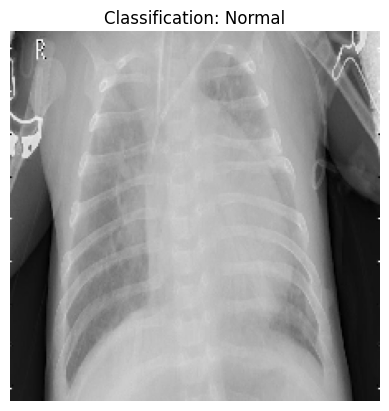

In [4]:
from google.colab import files
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the autoencoder model
autoencoder = load_model('/content/drive/MyDrive/FinalExercise/autoencoder.keras')
img_size=224

# Upload images
uploaded = files.upload()

# Preprocess and classify uploaded images
for filename in uploaded.keys():
    # Load and preprocess the image
    img_path = filename
    img = image.load_img(img_path, target_size=(img_size, img_size), color_mode='grayscale')
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Use the autoencoder for classification
    reconstructed_img = autoencoder.predict(img_array)

    # Calculate the reconstruction error
    reconstruction_error = np.mean(np.square(img_array - reconstructed_img))

    # Define a threshold for classification
    threshold = 0.002

    # Classify as normal or anomaly
    if reconstruction_error <= threshold:
        classification = 'Normal'
    else:
        classification = 'Pneumonia (Anomaly)'

    # Display the original image and classification
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f'Classification: {classification}')
    plt.show()
